In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
#  Get the Language description
df_lang = pd.read_html('https://docs.oracle.com/cd/E13214_01/wli/docs92/xref/xqisocodes.html', match='ISO-639 Language Codes')[0]
df_lang.rename(columns ={'ISO-639 Language Code': 'Lang_Code'}, inplace = True)

# Delete the duplicate Lang code 'zh' for Chinese
index_zh = df_lang[ df_lang['Language'] == 'Chinese (Traditional)' ].index
df_lang.drop(index_zh , inplace=True)
df_lang

,Language,Lang_Code
0,Abkhazian,ab
1,Afar,aa
2,Afrikaans,af
3,Albanian,sq
4,Amharic,am
...,...,...
136,Wolof,wo
137,Xhosa,xh
138,Yiddish,yi
139,Yoruba,yo


In [96]:
df_US_state_codes = pd.read_html('https://developer.cybersource.com/library/documentation/dev_guides/SmallBusiness/Intershop_NT/html/appC.html')[1]
df_US_state_codes.rename(columns ={'Two-Character Code': 'State_Code'}, inplace = True)

# Handle duplicate State Code 'AE'
index_AE = df_US_state_codes[ (df_US_state_codes['State'] == 'Armed Forces Africa') | (df_US_state_codes['State'] == 'Armed Forces Canada')|(df_US_state_codes['State'] == 'Armed Forces Europe')].index
df_US_state_codes.drop(index_AE , inplace=True)
df_US_state_codes.iloc[df_US_state_codes[df_US_state_codes['State_Code'] == 'AE'].index-3, 0] = 'Armed Forces - Africa/ME/Canada/Europe'
# df_US_state_codes[df_US_state_codes.State_Code == 'ME']


,State,State_Code
22,Maine,ME


In [21]:
# Data cleansing and enhancement
df_ecom = pd.read_csv('Ecommerce_Purchases.csv')
df_ecom_bkp = df_ecom

df_ecom.drop_duplicates()
# df_ecom.isna().sum()

# Add Language description using MERGE statement
df_ecom.rename(columns ={'Language': 'Lang_Code'}, inplace = True)
df_ecom = pd.merge(df_ecom,df_lang,how = 'left', on = 'Lang_Code' )
df_ecom['Address2'] = df_ecom['Address']

# Populate the State code 
df_ecom['State_Code'] = (df_ecom.Address.str.split(',', expand = True)[1]).str.split(' ', expand = True)[[1]]

df_none = (df_ecom.Address.str.split(',', expand = True)[1]).str.split(' ', expand = True)[[0]]
# df_none

idx_none = (df_none[df_none[0]!='']).index
# idx_none

for i in idx_none:
    df_ecom.iloc[i,16] = df_ecom.iloc[i,0].split(' ')[-2]

# Enhance the CC provider details
df_ecom['CC Provider_Lvl2'] = df_ecom['CC Provider']   
df_ecom['CC Provider'].replace(to_replace=['VISA 16 digit', 'JCB 16 digit', 'JCB 15 digit', 'VISA 13 digit'], value=['VISA', 'JCB', 'JCB', 'VISA'], inplace=True)
    
# Remove the redundant columns - 'Credit Card', 'IP Address', 'CC Security Code', 'CC Exp Date'
df_ecom.drop(columns = [ 'Credit Card', 'IP Address', 'CC Security Code', 'CC Exp Date', 'Address2'], inplace = True)
df_ecom = pd.merge(df_ecom,df_US_state_codes,how = 'left', on = 'State_Code' )
df_ecom['Currency']='$'

df_ecom['Users'] = (df_ecom.Email.str.split('@', expand = True)[0]).str.split(' ', expand = True)[[0]]
df_ecom['UserCount'] = 1


df_ecom


,Address,Lot,AM or PM,Browser Info,Company,CC Provider,Email,Job,Lang_Code,Purchase Price,Language,State_Code,CC Provider_Lvl2,State,Currency,Users,UserCount
0,"16629 Pace Camp Apt. 448\nAlexisborough, NE 77...",46 in,PM,Opera/9.56.(X11; Linux x86_64; sl-SI) Presto/2...,Martinez-Herman,JCB,pdunlap@yahoo.com,"Scientist, product/process development",el,98.14,Greek,NE,JCB 16 digit,Nebraska,$,pdunlap,1
1,"9374 Jasmine Spurs Suite 508\nSouth John, TN 8...",28 rn,PM,Opera/8.93.(Windows 98; Win 9x 4.90; en-US) Pr...,"Fletcher, Richards and Whitaker",Mastercard,anthony41@reed.com,Drilling engineer,fr,70.73,French,TN,Mastercard,Tennessee,$,anthony41,1
2,Unit 0065 Box 5052\nDPO AP 27450,94 vE,PM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Simpson, Williams and Pham",JCB,amymiller@morales-harrison.com,Customer service manager,de,0.95,German,AP,JCB 16 digit,Armed Forces Pacific,$,amymiller,1
3,"7780 Julia Fords\nNew Stacy, WA 45798",36 vm,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_0 ...,"Williams, Marshall and Buchanan",Discover,brent16@olson-robinson.info,Drilling engineer,es,78.04,Spanish,WA,Discover,Washington,$,brent16,1
4,"23012 Munoz Drive Suite 337\nNew Cynthia, TX 5...",20 IE,AM,Opera/9.58.(X11; Linux x86_64; it-IT) Presto/2...,"Brown, Watson and Andrews",Diners Club / Carte Blanche,christopherwright@gmail.com,Fine artist,es,77.82,Spanish,TX,Diners Club / Carte Blanche,Texas,$,christopherwright,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,"966 Castaneda Locks\nWest Juliafurt, CO 96415",92 XI,PM,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/5352 ...,Randall-Sloan,JCB,iscott@wade-garner.com,Printmaker,it,82.21,Italian,CO,JCB 15 digit,Colorado,$,iscott,1
9996,"832 Curtis Dam Suite 785\nNorth Edwardburgh, T...",41 JY,AM,Mozilla/5.0 (compatible; MSIE 9.0; Windows NT ...,"Hale, Collins and Wilson",JCB,mary85@hotmail.com,Energy engineer,pt,25.63,Portuguese,TX,JCB 16 digit,Texas,$,mary85,1
9997,Unit 4434 Box 6343\nDPO AE 28026-0283,74 Zh,AM,Mozilla/5.0 (Macintosh; U; Intel Mac OS X 10_7...,Anderson Ltd,VISA,tyler16@gmail.com,Veterinary surgeon,el,83.98,Greek,AE,VISA 16 digit,Armed Forces - Africa/ME/Canada/Europe,$,tyler16,1
9998,"0096 English Rest\nRoystad, IA 12457",74 cL,PM,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_8_8;...,Cook Inc,American Express,elizabethmoore@reid.net,Local government officer,es,38.84,Spanish,IA,American Express,Iowa,$,elizabethmoore,1


In [22]:
df_ecom_top_users = pd.pivot_table(data=df_ecom,   
                                   values = ['Purchase Price'], index=['Email', 'Users'],
                                   aggfunc = 'sum',).nlargest(5, ['Purchase Price'], keep='first')
# df_ecom_top_users.index.get_level_values(1)
df_ecom_top_users


,,Purchase Price
Email,Users,
brownsarah@gmail.com,brownsarah,198.83
wjohnson@yahoo.com,wjohnson,175.61
cgray@gmail.com,cgray,154.41
lawrenceemily@yahoo.com,lawrenceemily,154.31
wilsonjohn@yahoo.com,wilsonjohn,153.36


In [138]:
fig_Top5Users = px.bar(data_frame = df_ecom_top_users, y= df_ecom_top_users.index.get_level_values(1), x='Purchase Price', 
                       labels={'y':'Users', 'Purchase Price': 'Purchase Price - $'},orientation = 'h' , width=800, height=400,
                      title = 'Premium Customers based on Purchase')
fig_Top5Users.show()

In [62]:
fig_lang_distr2 = px.pie(data_frame = df_ecom, names = 'Language', values = 'UserCount', 
                         hole=.3, width=500, height=400,
                        title = 'User groups based on Language')

fig_lang_distr2.show()



In [469]:
fig_tim_distr = px.pie(data_frame = df_ecom, names = 'AM or PM', values = 'UserCount',hole=.3,
                      title = 'Buying pattern during AM/PM', width=400, height=400)
fig_tim_distr.show()

In [57]:
pivot_am_pm = pd.pivot_table(data=df_ecom, index=['AM or PM'], values = 'Purchase Price', 
                                   aggfunc = 'sum')

fig_tim_distr2 = px.bar(data_frame = pivot_am_pm, y = pivot_am_pm.index, x = 'Purchase Price',
                      title = 'Total purchase on the day - split per AM/PM',  
                        width=700, height=400, text = 'Purchase Price', 
                        labels={'Purchase Price': 'Purchase Price - $'})
fig_tim_distr2.update_traces(texttemplate='%{text:.2s}', textposition='inside')
fig_tim_distr2.show()

<AxesSubplot:title={'center':'Top 10 Companies based on Employee Purchase'}, xlabel='Company'>

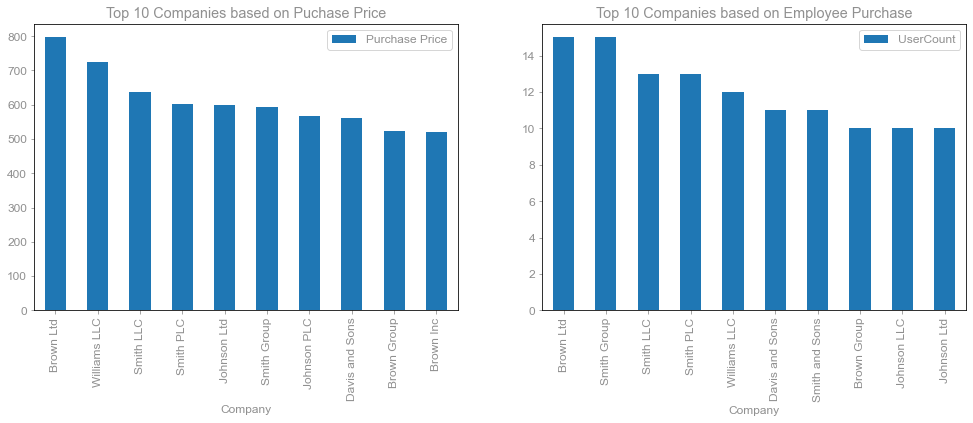

In [428]:
pivot_comp_pur_prc= pd.pivot_table(data=df_ecom, index=['Company'], values = 'Purchase Price', 
                                   aggfunc = 'sum').nlargest(10, 'Purchase Price', keep='first')
pivot_comp_pur_usrcnt = pd.pivot_table(data=df_ecom, index=['Company'], values = 'UserCount', 
                                       aggfunc = 'sum').nlargest(10, 'UserCount', keep='first')

a4_dims = (16.7, 5.27)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=a4_dims)
pivot_comp_pur_prc.plot(ax = ax1, kind = 'bar' , title='Top 10 Companies based on Puchase Price')
pivot_comp_pur_usrcnt.plot(ax = ax2, kind = 'bar', title='Top 10 Companies based on Employee Purchase')


# fig_comp_pur_prc= sns.barplot(ax = ax, data=pivot_comp_pur_prc, x=pivot_comp_pur_prc.index, y='Purchase Price',orient = 'v')
# fig_comp_pur_prc= sns.barplot(ax = ax, data=pivot_comp_pur_prc, y=pivot_comp_pur_prc.index, x='Purchase Price',orient = 'h')
# fig_comp_pur_prc.set_xticklabels(rotation=30)

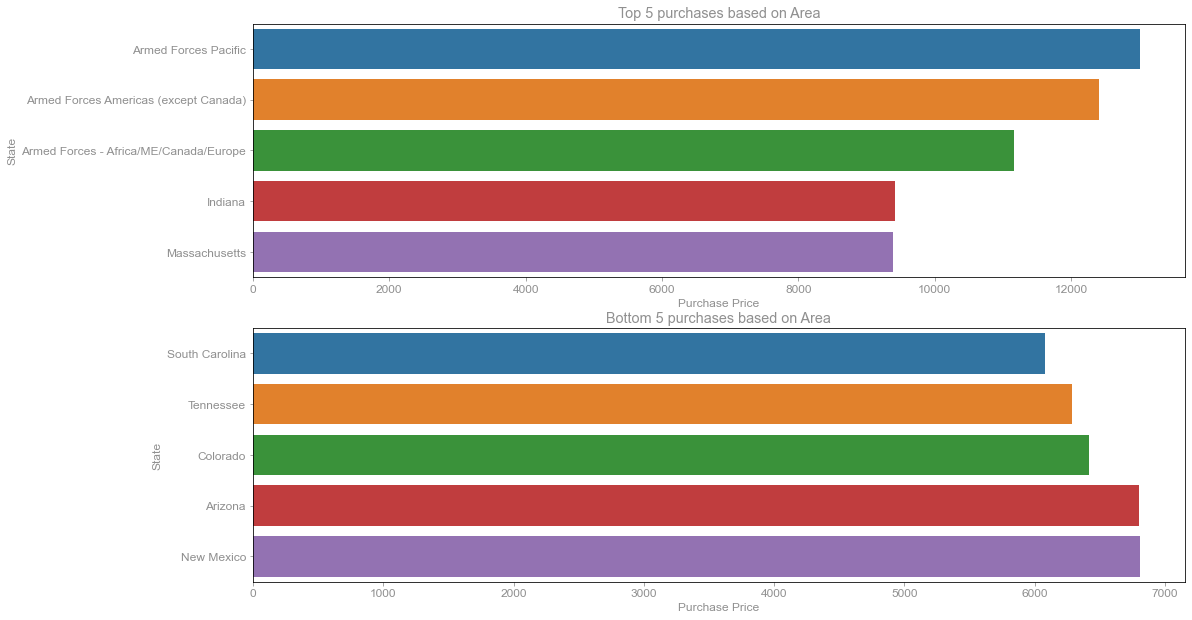

In [530]:
pivot_state_pur_top= pd.pivot_table(data=df_ecom, index=['State'], values = 'Purchase Price', aggfunc = 'sum').nlargest(5, 'Purchase Price', keep='first')
pivot_state_usrcnt = pd.pivot_table(data=df_ecom, index=['State'], values = 'UserCount', aggfunc = 'sum').nlargest(5, 'UserCount', keep='first')

pivot_state_pur_bottom= pd.pivot_table(data=df_ecom, index=['State'], values = 'Purchase Price', aggfunc = 'sum').nsmallest(5, 'Purchase Price', keep='first')

a4_dims = (16.7, 10.27)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=a4_dims)
fig_state_prc_top= sns.barplot(ax = ax1, data=pivot_state_pur_top, y=pivot_state_pur_top.index, 
                               x='Purchase Price',orient = 'h').set_title('Top 5 purchases based on Area')
fig_state_prc_bottom = sns.barplot(ax = ax2, data=pivot_state_pur_bottom, y=pivot_state_pur_bottom.index, 
                                   x='Purchase Price',orient = 'h'). set_title('Bottom 5 purchases based on Area')
# fig_state_usrcnt= sns.barplot(ax = ax, data=pivot_state_usrcnt, y=pivot_state_usrcnt.index, x='UserCount',orient = 'h')

In [484]:
fig_CC_provider = px.pie(data_frame = df_ecom, names = 'CC Provider', values = 'UserCount' , 
                         width=700, height=500,
                        title = 'Usage share per Credit Card provider')
fig_CC_provider.show()

In [409]:
fig_CC_provider_prc = px.pie(data_frame = df_ecom, names = 'CC Provider', values = 'Purchase Price')
fig_CC_provider_prc.show()

In [24]:
pivot_job_pur= pd.pivot_table(data=df_ecom, index=['Job'], values = 'Purchase Price', aggfunc = 'sum').nlargest(5, 'Purchase Price', keep='first')

# a4_dims = (11.7, 8.27)
# fig, ax = plt.subplots(figsize=a4_dims)
# fig_job_prc= sns.barplot(ax = ax, data=pivot_job_pur, y=pivot_job_pur.index, x='Purchase Price',orient = 'h')

fig_job_prc = px.bar(data_frame=pivot_job_pur, x='Purchase Price', y=pivot_job_pur.index, 
                     color='Purchase Price' , 
                     width=1000, height=300,
                    labels={'Job':'Occupation', 'Purchase Price': 'Purchase Price - $'}, 
                    title = 'Top 5 customer groups based on occupation')
fig_job_prc.show()

In [132]:
df_state = pd.pivot_table(df_ecom, values = ['Purchase Price', 'UserCount'], 
                          index = ['State_Code', 'State'], aggfunc = 'sum')

fig = px.scatter_geo(df_state, locations= df_state.index.get_level_values(0), locationmode = 'USA-states', scope = 'usa', 
                      hover_data = {'State': df_state.index.get_level_values(1), 'Purchase Price': ':.2f', 'UserCount':':d'},
                    )

fig.show()

In [118]:
df_state = pd.pivot_table(df_ecom, values = ['Purchase Price', 'UserCount'], index = ['State_Code', 'State'], aggfunc = 'sum')
df_state.index.get_level_values(1)

Index(['Armed Forces Americas (except Canada)',
       'Armed Forces - Africa/ME/Canada/Europe', 'Alaska', 'Alabama',
       'Armed Forces Pacific', 'Arkansas', 'American Samoa', 'Arizona',
       'California', 'Colorado', 'Connecticut', 'District of Columbia',
       'Delaware', 'Florida', 'Federated States of Micronesia', 'Georgia',
       'Guam', 'Hawaii', 'Iowa', 'Idaho', 'Illinois', 'Indiana', 'Kansas',
       'Kentucky', 'Louisiana', 'Massachusetts', 'Maryland', 'Maine',
       'Marshall Islands', 'Michigan', 'Minnesota', 'Missouri',
       'Northern Mariana Islands', 'Mississippi', 'Montana', 'North Carolina',
       'North Dakota', 'Nebraska', 'New Hampshire', 'New Jersey', 'New Mexico',
       'Nevada', 'New York', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Puerto Rico', 'Palau', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Virginia',
       'Virgin Islands', 'Vermont', 'Washington', 'Wisconsin', 'West Virginia',
       'Wy